<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Read-in-the-data" data-toc-modified-id="Read-in-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the data</a></span></li><li><span><a href="#Get-an-overview-of-the-data" data-toc-modified-id="Get-an-overview-of-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get an overview of the data</a></span></li><li><span><a href="#Accessing-individual-data-columns-in-Pandas" data-toc-modified-id="Accessing-individual-data-columns-in-Pandas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessing individual data columns in Pandas</a></span></li><li><span><a href="#Plotting-data" data-toc-modified-id="Plotting-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plotting data</a></span></li><li><span><a href="#Dealing-with-&quot;NaN&quot;-(missing)-entries" data-toc-modified-id="Dealing-with-&quot;NaN&quot;-(missing)-entries-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dealing with "NaN" (missing) entries</a></span></li><li><span><a href="#Preparing-the-input-data-for-the-MLP-(selecting-columns)" data-toc-modified-id="Preparing-the-input-data-for-the-MLP-(selecting-columns)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Preparing the input data for the MLP (selecting columns)</a></span></li><li><span><a href="#Preparing-MLP-training-matrices-with-normalized-values" data-toc-modified-id="Preparing-MLP-training-matrices-with-normalized-values-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Preparing MLP training matrices with normalized values</a></span><ul class="toc-item"><li><span><a href="#Plotting-data-ranges-by-the-help-of-histograms" data-toc-modified-id="Plotting-data-ranges-by-the-help-of-histograms-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Plotting data ranges by the help of histograms</a></span></li><li><span><a href="#Using-scikit-learn's-MinMaxScaler-to-scale-input-features-and-output-values" data-toc-modified-id="Using-scikit-learn's-MinMaxScaler-to-scale-input-features-and-output-values-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Using scikit-learn's MinMaxScaler to scale input features and output values</a></span></li><li><span><a href="#Replotting-some-data-columns-as-histograms-after-normalization" data-toc-modified-id="Replotting-some-data-columns-as-histograms-after-normalization-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Replotting some data columns as histograms after normalization</a></span></li></ul></li><li><span><a href="#Building-and-training-a-MLP-in-Keras" data-toc-modified-id="Building-and-training-a-MLP-in-Keras-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Building and training a MLP in Keras</a></span></li><li><span><a href="#Testing-the-trained-MLP" data-toc-modified-id="Testing-the-trained-MLP-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Testing the trained MLP</a></span></li><li><span><a href="#Predicting-house-prices-for-the-Kaggle-competition" data-toc-modified-id="Predicting-house-prices-for-the-Kaggle-competition-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Predicting house prices for the Kaggle competition</a></span></li></ul></div>

<p style="text-align: center;">Multi-Layer Perceptron (MLP) example in Keras <br> for house sales price prediction<br>using ONLY numerical features
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

# Introduction

In this Jupyter notebook we will see how to use Keras to implement a Multi-Layer Perceptron. The MLP will be able to predict house sale prices just on some features of these houses! The data stems from the Kaggle<br>
<p style="text-align: center;">
__["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__
</p><br>
competetion and consists of the following data:
- a training table: 1460 rows of 81 house features, where the last feature is the actual house sale price
- a test table: 1459 rows of 80 house features

For taking part in the competition, one has to predict for each of the 1459 houses in the test table the missing house price (feature #81) and submit a `my_submission.csv` file of the following form

*house-id ,  predicted-sale-price*<br>
*house-id ,  predicted-sale-price*<br>
*...*<br>
*house-id ,  predicted-sale-price*<br>




# Get the data

For getting the data go to
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
and press "download all". Then unzip the file to a folder `kaggle_dataset_house_prices`

There should be the following files in this folder:
- `data_description.txt`
- `sample_submission.csv`
- `test.csv`
- `train.csv`

# Read in the data

We now will read in the data in Python using Pandas, an

*"open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."*

Quote is from __[Pandas' webpage](https://pandas.pydata.org/)__

Further, we will show the data type of the training and test data read in and show its shape.

In [1]:
import pandas as pd
print("Your Pandas version is", pd.__version__)
train_data = pd.read_csv("kaggle_dataset_house_prices/train.csv")
test_data  = pd.read_csv("kaggle_dataset_house_prices/test.csv")
print("Type of train_data is ", type(train_data))
print("Type of test_data is ", type(test_data))
print("Shape of train_data is", train_data.shape)
print("Shape of test_data is", test_data.shape)

Your Pandas version is 0.20.3
Type of train_data is  <class 'pandas.core.frame.DataFrame'>
Type of test_data is  <class 'pandas.core.frame.DataFrame'>
Shape of train_data is (1460, 81)
Shape of test_data is (1459, 80)


The first dimension of the shape is the number of rows. It corresponds to the number of houses that are stored in the Pandas DataFrame (table).

The second dimension of the shape is the number of columns. It corresponds to the number of features that are stored per house.

# Get an overview of the data

It is important to know how the raw data looks like which we are going to use in the following. Let's try to print the data directly:

In [2]:
print(train_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

Note, that there are some entries "NaN", which means "Not a Number" or "missing". We will have to remember this issue and deal with the missing data later!

However, this does not give us a good overview!

For this, let us retrieve the column names in the training data table directly and print them:

In [3]:
column_names = train_data.columns.values
print("Type of column_names is", type(column_names))
i=0
for column_name in column_names:
    print(i, ":", column_name)
    i+=1

Type of column_names is <class 'numpy.ndarray'>
0 : Id
1 : MSSubClass
2 : MSZoning
3 : LotFrontage
4 : LotArea
5 : Street
6 : Alley
7 : LotShape
8 : LandContour
9 : Utilities
10 : LotConfig
11 : LandSlope
12 : Neighborhood
13 : Condition1
14 : Condition2
15 : BldgType
16 : HouseStyle
17 : OverallQual
18 : OverallCond
19 : YearBuilt
20 : YearRemodAdd
21 : RoofStyle
22 : RoofMatl
23 : Exterior1st
24 : Exterior2nd
25 : MasVnrType
26 : MasVnrArea
27 : ExterQual
28 : ExterCond
29 : Foundation
30 : BsmtQual
31 : BsmtCond
32 : BsmtExposure
33 : BsmtFinType1
34 : BsmtFinSF1
35 : BsmtFinType2
36 : BsmtFinSF2
37 : BsmtUnfSF
38 : TotalBsmtSF
39 : Heating
40 : HeatingQC
41 : CentralAir
42 : Electrical
43 : 1stFlrSF
44 : 2ndFlrSF
45 : LowQualFinSF
46 : GrLivArea
47 : BsmtFullBath
48 : BsmtHalfBath
49 : FullBath
50 : HalfBath
51 : BedroomAbvGr
52 : KitchenAbvGr
53 : KitchenQual
54 : TotRmsAbvGrd
55 : Functional
56 : Fireplaces
57 : FireplaceQu
58 : GarageType
59 : GarageYrBlt
60 : GarageFinish
61 : 

# Accessing individual data columns in Pandas

Let's say, we want to plot the sale price as a function of the year in which the house was built, since we assume, that newer houses will be sold for higher prices.

For this, we have to access individual columns:

In [4]:
yearbuilt_column = train_data["YearBuilt"].values
saleprice_column = train_data["SalePrice"].values
print("Type of yearbuilt_column is", type(yearbuilt_column))
for row_nr in range(0,10):
    print("YearBuilt: ", yearbuilt_column[row_nr],
          "--> SalePrice: ", saleprice_column[row_nr])

Type of yearbuilt_column is <class 'numpy.ndarray'>
YearBuilt:  2003 --> SalePrice:  208500
YearBuilt:  1976 --> SalePrice:  181500
YearBuilt:  2001 --> SalePrice:  223500
YearBuilt:  1915 --> SalePrice:  140000
YearBuilt:  2000 --> SalePrice:  250000
YearBuilt:  1993 --> SalePrice:  143000
YearBuilt:  2004 --> SalePrice:  307000
YearBuilt:  1973 --> SalePrice:  200000
YearBuilt:  1931 --> SalePrice:  129900
YearBuilt:  1939 --> SalePrice:  118000


# Plotting data

Let's plot the sale price as a function of the year built to better "see" whether there is a relationship between these two features!

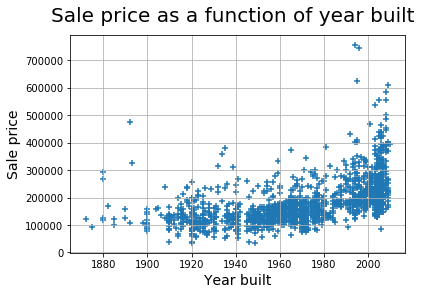

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure("SalePrice analysis")
fig.suptitle("Sale price as a function of year built", fontsize=20)
plt.scatter(yearbuilt_column, saleprice_column, marker="+")
plt.grid(True)
plt.xlabel("Year built", fontsize=14)
plt.ylabel("Sale price", fontsize=14)
plt.show()

It seems that there is no clear linear relationship between the year built and the sale price. We can compute the Pearson correlation coefficient in order to check this:

In [6]:
from scipy.stats.stats import pearsonr

print("Pearson correlation coefficient of year built and sale price vectors is",
      pearsonr(yearbuilt_column, saleprice_column)[0])

Pearson correlation coefficient of year built and sale price vectors is 0.5228973328794969


0.522897332879 is not really a large linear correlation. However, note that there might be a NON-linear relationship between these two features that cannot be measured by the Pearson correlation coefficient.

# Dealing with "NaN" (missing) entries

We have seen above that there are sometimes missing values. Why?

E.g. for many houses the "Fence" feature makes no sense, if there is no fence!

    Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo     Good Wood
       MnWw 	Minimum Wood/Wire
       NA   	No Fence
       
For the sake of simplicity, let us replace all NaN values in both the training and testing data with zeros.

In [7]:
print("Fence column before NaN replacement:\n", train_data["Fence"])
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)
print("Fence column after NaN replacement:\n", train_data["Fence"])

Fence column before NaN replacement:
 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5       MnPrv
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14       GdWo
15      GdPrv
16        NaN
17        NaN
18        NaN
19      MnPrv
20        NaN
21      GdPrv
22        NaN
23        NaN
24      MnPrv
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1430      NaN
1431      NaN
1432      NaN
1433      NaN
1434      NaN
1435    GdPrv
1436     GdWo
1437      NaN
1438    MnPrv
1439      NaN
1440      NaN
1441      NaN
1442      NaN
1443      NaN
1444      NaN
1445      NaN
1446      NaN
1447      NaN
1448     GdWo
1449      NaN
1450      NaN
1451      NaN
1452      NaN
1453      NaN
1454      NaN
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object
Fence column after NaN replacement:
 0           0
1           0
2 

# Preparing the input data for the MLP (selecting columns)

We have seen before, that there are some columns in the table(s) that store numeric values and other categorial values. How can we check this using Pandas?

In [8]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Let us start simple: we will use only numeric values in the following. For this, let us prepare tables, that exclude "object" columns:

In [9]:
train_data = train_data.select_dtypes(exclude=['object'])
test_data = test_data.select_dtypes(exclude=['object'])
print("Shape of train_data is now", train_data.shape)
print("Shape of test_data is now", test_data.shape)

Shape of train_data is now (1460, 38)
Shape of test_data is now (1459, 37)


Ok, that is what we expected! There are fewer columns (fewer features) available, but the number of houses is still the same.

Let us now print the list of "remaining" features:

In [10]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


# Preparing MLP training matrices with normalized values

The numerical values in our training matrix "live" in different ranges. This often makes problems for MLPs, since some values can be very small (e.g. from [0,0.1]) and some can be very large (e.g. from [10000,100000]).

## Plotting data ranges by the help of histograms

Let us first get an impression how different the values are!

Type of feature1 is <class 'numpy.ndarray'>
[ 856 1262  920 ... 1188 1078 1256]
Type of feature2 is <class 'numpy.ndarray'>
[208500 181500 223500 ... 266500 142125 147500]


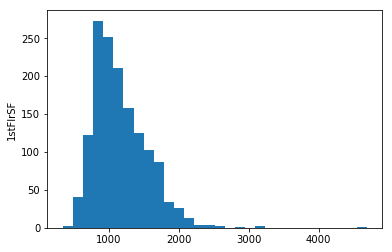

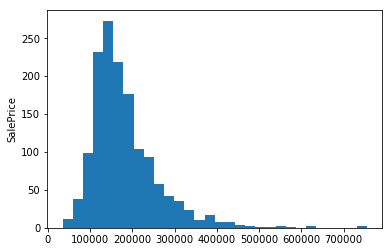

In [11]:
feature1 = train_data["1stFlrSF"].values
print("Type of feature1 is", type(feature1))
print(feature1)

feature2 = train_data["SalePrice"].values
print("Type of feature2 is", type(feature2))
print(feature2)

plt.hist(feature1, bins=30)
plt.ylabel('1stFlrSF')
plt.show()

plt.hist(feature2, bins=30)
plt.ylabel('SalePrice')
plt.show()



So "1stFlrSF" has values somewhere between ca. 500 and 4.500, while "SalePrice" has values between ca. 40.000 and 750.000.

## Using scikit-learn's MinMaxScaler to scale input features and output values

For this, let us normalize the values of the training matrix, such that all values within a feature column are normalized to the range [0,1]. We can realize such a normalization using the MinMaxScaler of scikit-learn:

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. define how NumPy shall print matrices
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) # do not use scientific "e"-notation

# 2. convert Pandas DataFrame to NumPy matrices
#    since Keras will expect NumPy matrices
train_input_matrix = train_data.values[:,1:37]
train_output_matrix = train_data.values[:,37]
train_output_matrix = train_output_matrix.reshape(-1,1)
test_input_matrix  = test_data.values[:,1:]
print("Shape of Pandas DataFrame train_data is", train_data.shape)
print("Type of train_input_matrix is", type(train_input_matrix))
print("Shape of train_input_matrix is", train_input_matrix.shape)
print("Shape of train_output_matrix is", train_output_matrix.shape)
print("Shape of test_input_matrix is", test_input_matrix.shape)

# 3. create a MinMaxScaler with feature range [0,1]
#    and use it to normalize the train_input_matrix
#    Then use the SAME normalization to normalize test_data_matrix
scaler_input_features = MinMaxScaler(feature_range=(0, 1))
normalized_train_input_matrix = scaler_input_features.fit_transform(train_input_matrix)
normalized_test_input_matrix = scaler_input_features.transform(test_input_matrix)

# 4. show train data matrix before and after normalization
print("\ntrain_input_matrix:\n", train_input_matrix)
print("\nnormalized_train_input_matrix:\n", normalized_train_input_matrix)

# 5. show test data matrix before and after normalization
print("\ntest_input_matrix:\n", test_input_matrix)
print("\nnormalized_test_input_matrix:\n", normalized_test_input_matrix)

# 6. also create a MinMaxScaler for the train_output_matrix,
#    which is essentially a column with the final SalePrice
scaler_saleprice = MinMaxScaler(feature_range=(0, 1))
normalized_train_output_matrix = scaler_saleprice.fit_transform(train_output_matrix)
print("\ntrain_output_matrix:\n", train_output_matrix)
print("\nnormalized_train_output_matrix:\n", normalized_train_output_matrix)


Shape of Pandas DataFrame train_data is (1460, 38)
Type of train_input_matrix is <class 'numpy.ndarray'>
Shape of train_input_matrix is (1460, 36)
Shape of train_output_matrix is (1460, 1)
Shape of test_input_matrix is (1459, 36)

train_input_matrix:
 [[   60.    65.  8450. ...     0.     2.  2008.]
 [   20.    80.  9600. ...     0.     5.  2007.]
 [   60.    68. 11250. ...     0.     9.  2008.]
 ...
 [   70.    66.  9042. ...  2500.     5.  2010.]
 [   20.    68.  9717. ...     0.     4.  2010.]
 [   20.    75.  9937. ...     0.     6.  2008.]]

normalized_train_input_matrix:
 [[0.2353 0.2077 0.0334 ... 0.     0.0909 0.5   ]
 [0.     0.2556 0.0388 ... 0.     0.3636 0.25  ]
 [0.2353 0.2173 0.0465 ... 0.     0.7273 0.5   ]
 ...
 [0.2941 0.2109 0.0362 ... 0.1613 0.3636 1.    ]
 [0.     0.2173 0.0393 ... 0.     0.2727 1.    ]
 [0.     0.2396 0.0404 ... 0.     0.4545 0.5   ]]

test_input_matrix:
 [[   20.    80. 11622. ...     0.     6.  2010.]
 [   20.    81. 14267. ... 12500.     6.  201

## Replotting some data columns as histograms after normalization

Do you wonder how the plots look like after normalization? Let's plot the histograms of the normalized data.

[60. 20. 60. ... 70. 20. 20.]


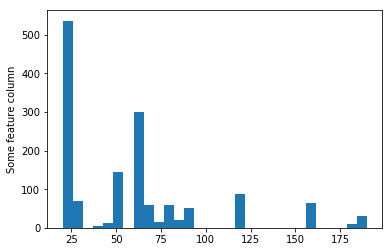

[0.2353 0.     0.2353 ... 0.2941 0.     0.    ]


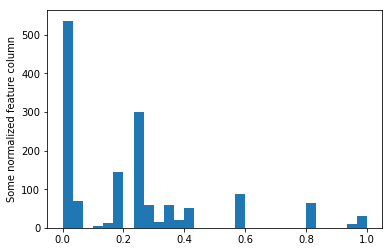

In [13]:
a_feature_column = train_input_matrix[:,0]
print(a_feature_column)
plt.hist(a_feature_column, bins=30)
plt.ylabel('Some feature column')
plt.show()

a_feature_column_normalized = normalized_train_input_matrix[:,0]
print(a_feature_column_normalized)
plt.hist(a_feature_column_normalized, bins=30)
plt.ylabel('Some normalized feature column')
plt.show()

# Building and training a MLP in Keras

Now let us build a simple MLP in Keras and train it using the normalized data matrices we have just prepared.

In [14]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout
import pandas as pd
import numpy as np

model = Sequential()
model.add(Dense(160, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer='sgd')

X = normalized_train_input_matrix
Y = normalized_train_output_matrix
model.fit(X,Y, validation_split=0.10, epochs=1000)

Using TensorFlow backend.


Train on 1314 samples, validate on 146 samples
Epoch 1/1000
1314/1314 [==============================] - 0s 94us/step - loss: 0.0224 - val_loss: 0.0085
Epoch 2/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0087 - val_loss: 0.0066
Epoch 3/1000
1314/1314 [==============================] - 0s 41us/step - loss: 0.0070 - val_loss: 0.0055
Epoch 4/1000
1314/1314 [==============================] - 0s 41us/step - loss: 0.0059 - val_loss: 0.0047
Epoch 5/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0053 - val_loss: 0.0044
Epoch 6/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 7/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0045 - val_loss: 0.0039
Epoch 8/1000
1314/1314 [==============================] - 0s 40us/step - loss: 0.0043 - val_loss: 0.0037
Epoch 9/1000
1314/1314 [==============================] - 0s 57us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 10

Epoch 78/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 79/1000
1314/1314 [==============================] - 0s 70us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 80/1000
1314/1314 [==============================] - 0s 61us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 81/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 82/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 83/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 84/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 85/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 86/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 87/1000
1314/1314 [=====================

Epoch 155/1000
1314/1314 [==============================] - 0s 32us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 156/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 157/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 158/1000
1314/1314 [==============================] - 0s 33us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 159/1000
1314/1314 [==============================] - 0s 36us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 160/1000
1314/1314 [==============================] - 0s 56us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 161/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 162/1000
1314/1314 [==============================] - 0s 32us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 163/1000
1314/1314 [==============================] - 0s 40us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 164/1000
1314/1314 [===========

1314/1314 [==============================] - 0s 34us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 232/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 233/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 234/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0018 - val_loss: 0.0019
Epoch 235/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 236/1000
1314/1314 [==============================] - 0s 33us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 237/1000
1314/1314 [==============================] - 0s 37us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 238/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 239/1000
1314/1314 [==============================] - 0s 32us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 240/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 56us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 308/1000
1314/1314 [==============================] - 0s 33us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 309/1000
1314/1314 [==============================] - 0s 52us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 310/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 311/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 312/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 313/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 314/1000
1314/1314 [==============================] - 0s 32us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 315/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 316/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 34us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 384/1000
1314/1314 [==============================] - 0s 57us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 385/1000
1314/1314 [==============================] - 0s 32us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 386/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 387/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 388/1000
1314/1314 [==============================] - 0s 32us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 389/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 390/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 391/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 392/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 70us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 460/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 461/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 462/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 463/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 464/1000
1314/1314 [==============================] - 0s 67us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 465/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 466/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 467/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 468/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 52us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 536/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 537/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 538/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 539/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 540/1000
1314/1314 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 541/1000
1314/1314 [==============================] - 0s 65us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 542/1000
1314/1314 [==============================] - 0s 33us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 543/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 544/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 34us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 612/1000
1314/1314 [==============================] - 0s 57us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 613/1000
1314/1314 [==============================] - 0s 69us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 614/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 615/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 616/1000
1314/1314 [==============================] - 0s 36us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 617/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 618/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 619/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 620/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 34us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 688/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 689/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 690/1000
1314/1314 [==============================] - 0s 33us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 691/1000
1314/1314 [==============================] - 0s 36us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 692/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 693/1000
1314/1314 [==============================] - 0s 71us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 694/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 695/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 696/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 33us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 764/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 765/1000
1314/1314 [==============================] - 0s 36us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 766/1000
1314/1314 [==============================] - 0s 30us/step - loss: 0.0012 - val_loss: 0.0016
Epoch 767/1000
1314/1314 [==============================] - 0s 37us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 768/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 769/1000
1314/1314 [==============================] - 0s 36us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 770/1000
1314/1314 [==============================] - 0s 36us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 771/1000
1314/1314 [==============================] - 0s 71us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 772/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 72us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 840/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 841/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0012 - val_loss: 0.0016
Epoch 842/1000
1314/1314 [==============================] - 0s 69us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 843/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 844/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 845/1000
1314/1314 [==============================] - 0s 91us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 846/1000
1314/1314 [==============================] - 0s 52us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 847/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 848/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 916/1000
1314/1314 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 917/1000
1314/1314 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 918/1000
1314/1314 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 919/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 920/1000
1314/1314 [==============================] - 0s 40us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 921/1000
1314/1314 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 922/1000
1314/1314 [==============================] - 0s 41us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 923/1000
1314/1314 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 924/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 40us/step - loss: 0.0011 - val_loss: 0.0021
Epoch 992/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 993/1000
1314/1314 [==============================] - 0s 35us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 994/1000
1314/1314 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 995/1000
1314/1314 [==============================] - 0s 33us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 996/1000
1314/1314 [==============================] - 0s 73us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 997/1000
1314/1314 [==============================] - 0s 38us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 998/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 999/1000
1314/1314 [==============================] - 0s 34us/step - loss: 0.0011 - val_loss: 0.0022
Epoch 1000/1000
1314/1314 [=========================

# Testing the trained MLP

Normally we test a model on a separate test data set. However, in this case, there is no test dataset, since the test data only contains the input features, but not the final sale prices of the houses.

For this, let us see how good the trained model can predict the sale prices of the houses from the training dataset.

preds_train_houses:
 [[0.2663]
 [0.2204]
 [0.2744]
 ...
 [0.285 ]
 [0.1048]
 [0.1818]]
preds_train_houses_dollar:
 [[226649.64 ]
 [193603.55 ]
 [232479.97 ]
 ...
 [240095.06 ]
 [110392.445]
 [165805.36 ]]
Shape of preds_train_houses is (1460, 1)
Shape of preds_train_houses_dollar is (1460, 1)


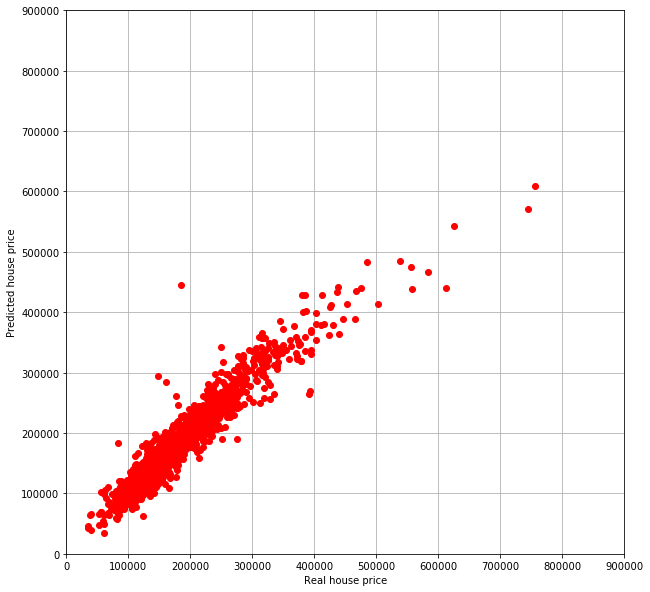

In [15]:
preds_train_houses = model.predict(normalized_train_input_matrix)
print("preds_train_houses:\n", preds_train_houses)
preds_train_houses_dollar = scaler_saleprice.inverse_transform(preds_train_houses)
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("Shape of preds_train_houses is", preds_train_houses.shape)
print("Shape of preds_train_houses_dollar is", preds_train_houses_dollar.shape)
plt.figure( figsize=(10,10) )
plt.plot(train_output_matrix, preds_train_houses_dollar, 'ro')
plt.xlabel('Real house price', fontsize = 10)
plt.ylabel('Predicted house price', fontsize = 10)
plt.grid(True)
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.show()

The plot gives us already a good overview of how good the model is able to "reproduce" the sale prices of the houses from the training dataset. In the ideal case we would see here... what? Think about it! Yes, the identity function. If the real house price is x Dollar, the predicted house price should be x Dollar as well, or?

However, the goal of the training of the model is not to "reproduce" the sale prices as good as possible! The actual goal is that the model captures the underlying relationships between the house features and the sale price. For this, "generalization" too new data is much more important than "reproducing" the training data. That's an important point to understand!

Since we used all the data for training, no ground truth data remains for testing. However, let us compute the average error in Dollar we make, when we predict the prices of houses stemming from the training data:

In [16]:
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("train_output_matrix:\n", train_output_matrix)
absdiff = np.abs(preds_train_houses_dollar - train_output_matrix)
print(absdiff)
average_error_in_dollar = np.mean(absdiff)
print("The final trained model made an average error of $%.2f" % average_error_in_dollar,
      "when predicting the house prices on the training data!")

preds_train_houses_dollar:
 [[226649.64 ]
 [193603.55 ]
 [232479.97 ]
 ...
 [240095.06 ]
 [110392.445]
 [165805.36 ]]
train_output_matrix:
 [[208500.]
 [181500.]
 [223500.]
 ...
 [266500.]
 [142125.]
 [147500.]]
[[18149.6406]
 [12103.5469]
 [ 8979.9688]
 ...
 [26404.9375]
 [31732.5547]
 [18305.3594]]
The final trained model made an average error of $16061.61 when predicting the house prices on the training data!


# Predicting house prices for the Kaggle competition

Now we will use the trained MLP to predict the prices of the houses for which only the features are given, but not the sale price!

This file can be uploaded at Kaggle to take part at the Kaggle competition!

In [17]:
# PREDICT house prices for all the test houses!
preds_test_houses = model.predict(normalized_test_input_matrix)
preds_test_houses_dollar = scaler_saleprice.inverse_transform(preds_test_houses)


# generate a Pandas dataframe
# from the NumPy prediction_matrix
test_house_ids = test_data.values[:,0] # get the IDs from the original Pandas DataFrame
preds_test_houses_dollar = preds_test_houses_dollar.reshape(-1)
print("test_house_ids has shape", test_house_ids.shape)
print("preds_test_houses_dollar has shape", preds_test_houses_dollar.shape)
predition_dataframe = pd.DataFrame({'Id'       :test_house_ids,
                                    'SalePrice':preds_test_houses_dollar}
                                  )

# convert column "Id" to int64 dtype
predition_dataframe = predition_dataframe.astype({"Id": int})
print(predition_dataframe)

# now save the Pandas dataframe to a .csv file
PREDICTION_FILENAME = "my_predicted_house_prices.csv"
predition_dataframe.to_csv(PREDICTION_FILENAME, sep=',', index=False)

test_house_ids has shape (1459,)
preds_test_houses_dollar has shape (1459,)
        Id      SalePrice
0     1461  127710.546875
1     1462  189062.750000
2     1463  163260.609375
3     1464  186297.718750
4     1465  196085.437500
5     1466  170317.281250
6     1467  186157.656250
7     1468  160085.421875
8     1469  202236.812500
9     1470  104301.921875
10    1471  201163.765625
11    1472  109262.632812
12    1473  106221.375000
13    1474  151523.109375
14    1475  121920.195312
15    1476  356827.750000
16    1477  244487.625000
17    1478  290987.625000
18    1479  279552.343750
19    1480  405996.312500
20    1481  310128.968750
21    1482  211716.875000
22    1483  178161.562500
23    1484  180839.218750
24    1485  195227.640625
25    1486  202534.500000
26    1487  344356.500000
27    1488  259874.500000
28    1489  196310.484375
29    1490  231161.500000
...    ...            ...
1429  2890   85053.546875
1430  2891  130069.632812
1431  2892   73770.593750
1432  2893   8